## Import Packages

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


## Load the data

In [25]:
data = pd.read_csv("C:/Users/krish/Data Science Projects/Task-3/spam.csv", encoding= 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [27]:
print(data.shape)

(5572, 5)


In [28]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [29]:
data['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [31]:
data.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [32]:
data.groupby('v2').describe()

v1                   \
                                                   count unique  top freq   
v2                                                                          
 &lt;#&gt;  in mca. But not conform.                   1      1  ham    1   
 &lt;#&gt;  mins but i had to stop somewhere fi...     1      1  ham    1   
 &lt;DECIMAL&gt; m but its not a common car her...     1      1  ham    1   
 and  picking them up from various points              1      1  ham    1   
 came to look at the flat, seems ok, in his 50s...     1      1  ham    1   
...                                                  ...    ...  ...  ...   
ÌÏ still got lessons?  ÌÏ in sch?                      1      1  ham    1   
ÌÏ takin linear algebra today?                         1      1  ham    1   
ÌÏ thk of wat to eat tonight.                          1      1  ham    1   
ÌÏ v ma fan...                                         1      1  ham    1   
ÌÏ wait 4 me in sch i finish ard 5..                   1      1  ham    1   

                                                   Unnamed: 2              \
                                                        count unique  top   
v2                                                                          
 &lt;#&gt;  in mca. But not conform.                        0      0  NaN   
 &lt;#&gt;  mins but i had to stop somewhere fi...          0      0  NaN   
 &lt;DECIMAL&gt; m but its not a common car her...          0      0  NaN   
 and  picking them up from various points                   0      0  NaN   
 came to look at the flat, seems ok, in his 50s...          0      0  NaN   
...                                                       ...    ...  ...   
ÌÏ still got lessons?  ÌÏ in sch?                           0      0  NaN   
ÌÏ takin linear algebra today?                              0      0  NaN   
ÌÏ thk of wat to eat tonight.                               0      0  NaN   
ÌÏ v ma fan...                                              0      0  NaN   
ÌÏ wait 4 me in sch i finish ard 5..                        0      0  NaN   

                                                        Unnamed: 3         \
                                                   freq      count unique   
v2                                                                          
 &lt;#&gt;  in mca. But not conform.                NaN          0      0   
 &lt;#&gt;  mins but i had to stop somewhere fi...  NaN          0      0   
 &lt;DECIMAL&gt; m but its not a common car her...  NaN          0      0   
 and  picking them up from various points           NaN          0      0   
 came to look at the flat, seems ok, in his 50s...  NaN          0      0   
...                                                 ...        ...    ...   
ÌÏ still got lessons?  ÌÏ in sch?                   NaN          0      0   
ÌÏ takin linear algebra today?                      NaN          0      0   
ÌÏ thk of wat to eat tonight.                       NaN          0      0   
ÌÏ v ma fan...                                      NaN          0      0   
ÌÏ wait 4 me in sch i finish ard 5..                NaN          0      0   

                                                             Unnamed: 4  \
                                                    top freq      count   
v2                                                                        
 &lt;#&gt;  in mca. But not conform.                NaN  NaN          0   
 &lt;#&gt;  mins but i had to stop somewhere fi...  NaN  NaN          0   
 &lt;DECIMAL&gt; m but its not a common car her...  NaN  NaN          0   
 and  picking them up from various points           NaN  NaN          0   
 came to look at the flat, seems ok, in his 50s...  NaN  NaN          0   
...                                                 ...  ...        ...   
ÌÏ still got lessons?  ÌÏ in sch?                   NaN  NaN          0   
ÌÏ takin linear algebra today?                      NaN  NaN       

### Countplot

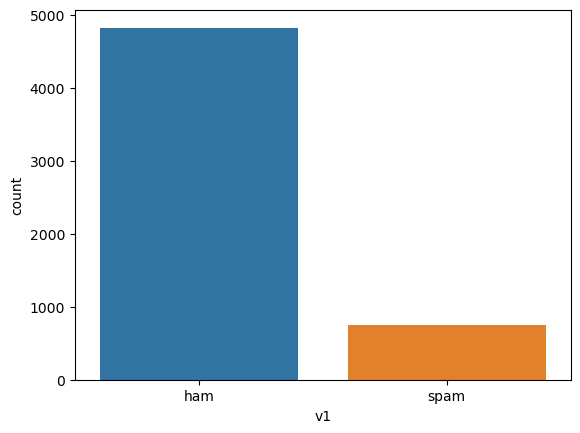

In [33]:
sns.countplot(data['v1']);
plt.show()

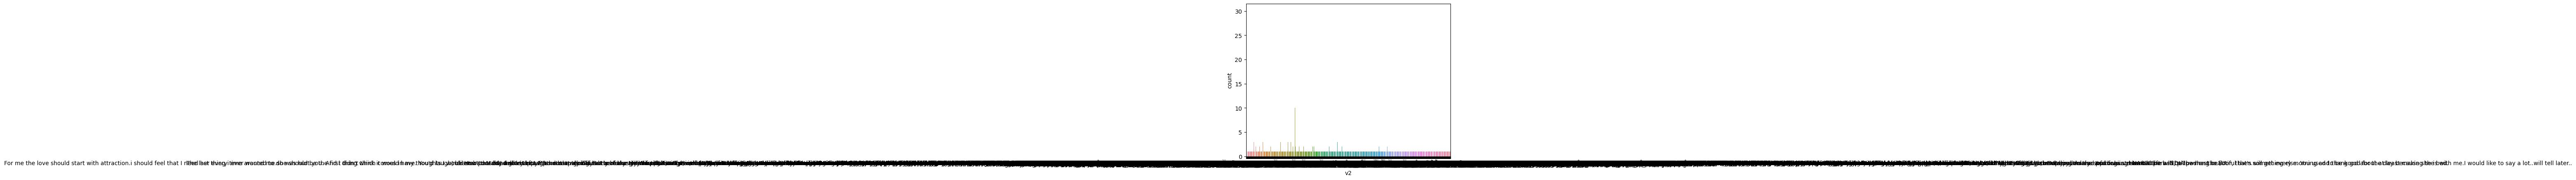

In [36]:
sns.countplot(data['v2']);
plt.show()

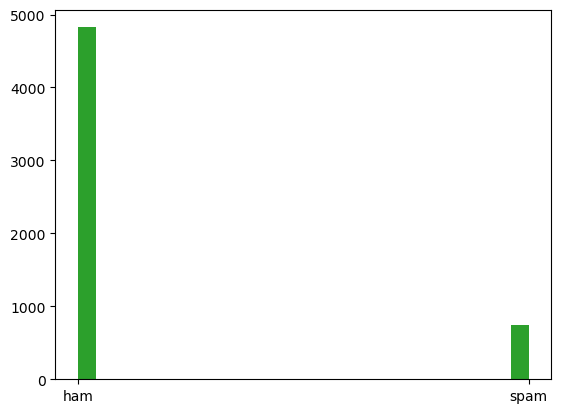

In [39]:
plt.hist(data["v1"],bins = 25);
plt.show()

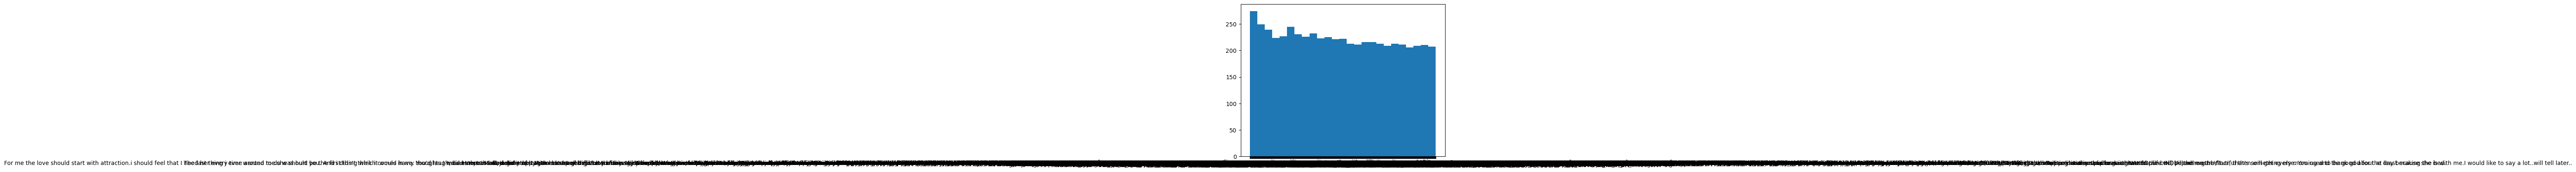

In [40]:
plt.hist(data["v2"],bins = 25);
plt.show()

#### Turn spam/ham into numerical data,creating a nwe cloumn called "sapm"

In [7]:
data['spam'] = data['v1'].apply(lambda x:1 if x=='spam' else 0 )

In [8]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


### Split this dataset into training and test sets 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data.v2,data.spam, test_size=0.25)

In [10]:

# find the word count and  store data as a matrix
 
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [11]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Train model

In [12]:
model = MultinomialNB()
print(model.fit(x_train_count,y_train))

MultinomialNB()


### Pre-test ham

In [13]:
email_ham = ["baseball tickets later"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0], dtype=int64)

### Pre-test spam

In [14]:
email_spam = ["reward money click"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1], dtype=int64)

In [15]:
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)

0.9899497487437185